In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import os.path as path

In [2]:
flow_params = pd.read_csv("../data/flow_parameters.csv", index_col=0)
flow_params = flow_params.drop('Unnamed: 9', axis=1)
flow_params = flow_params.drop('FLOW_RATE', axis=1)
flow_params = flow_params.drop(['alpha', 'beta'], axis=1)

In [3]:
quants = pd.read_csv(
    "../results/LFR_DZ_CSTR/results/eval_outputs.csv", 
    index_col=0, 
    header=0
    )

DOE = pd.read_csv(
    "../data/CASE_PARAMETERS_MODEL.csv", 
    index_col=0, 
    header=0
)

df = DOE.merge(quants, on='CASE_NUM')
df = df.merge(flow_params, on='CASE_NUM')


In [4]:

print(df.columns)

Index(['COHORT', 'GEOMETRY', 'FLOW_RATE', 'PERC_DS', 'RAMP_ANGLE',
       'VISCOUS_MODEL', 'ARTERIAL_VOLUME', 'TIMESTEP_SIZE', 'NO_TIMESTEPS',
       'alpha', 'beta', 'RAE_Etheta', 'RAE_Et', 'RAE_C', 'MAE_C',
       'avg_residual', 'std_residual', 'gamma', 'RAE',
       'FLUENT_DEADZONE_VOLUME', 'LAMINAR_VOLUME', 'CSTSR_VOLUME'],
      dtype='object')


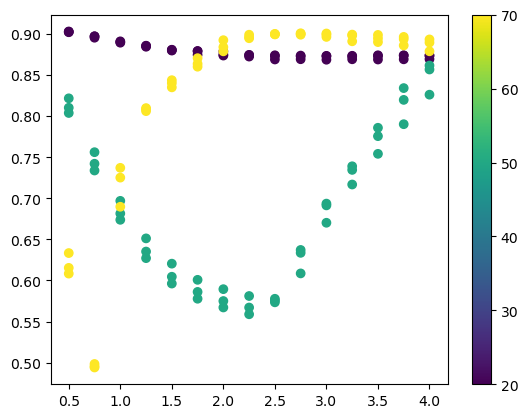

In [5]:
plt.figure()
plt.scatter(df.FLOW_RATE, df.alpha, c=df.PERC_DS)
plt.colorbar()
plt.show()

In [6]:

import matplotlib.lines as mlines

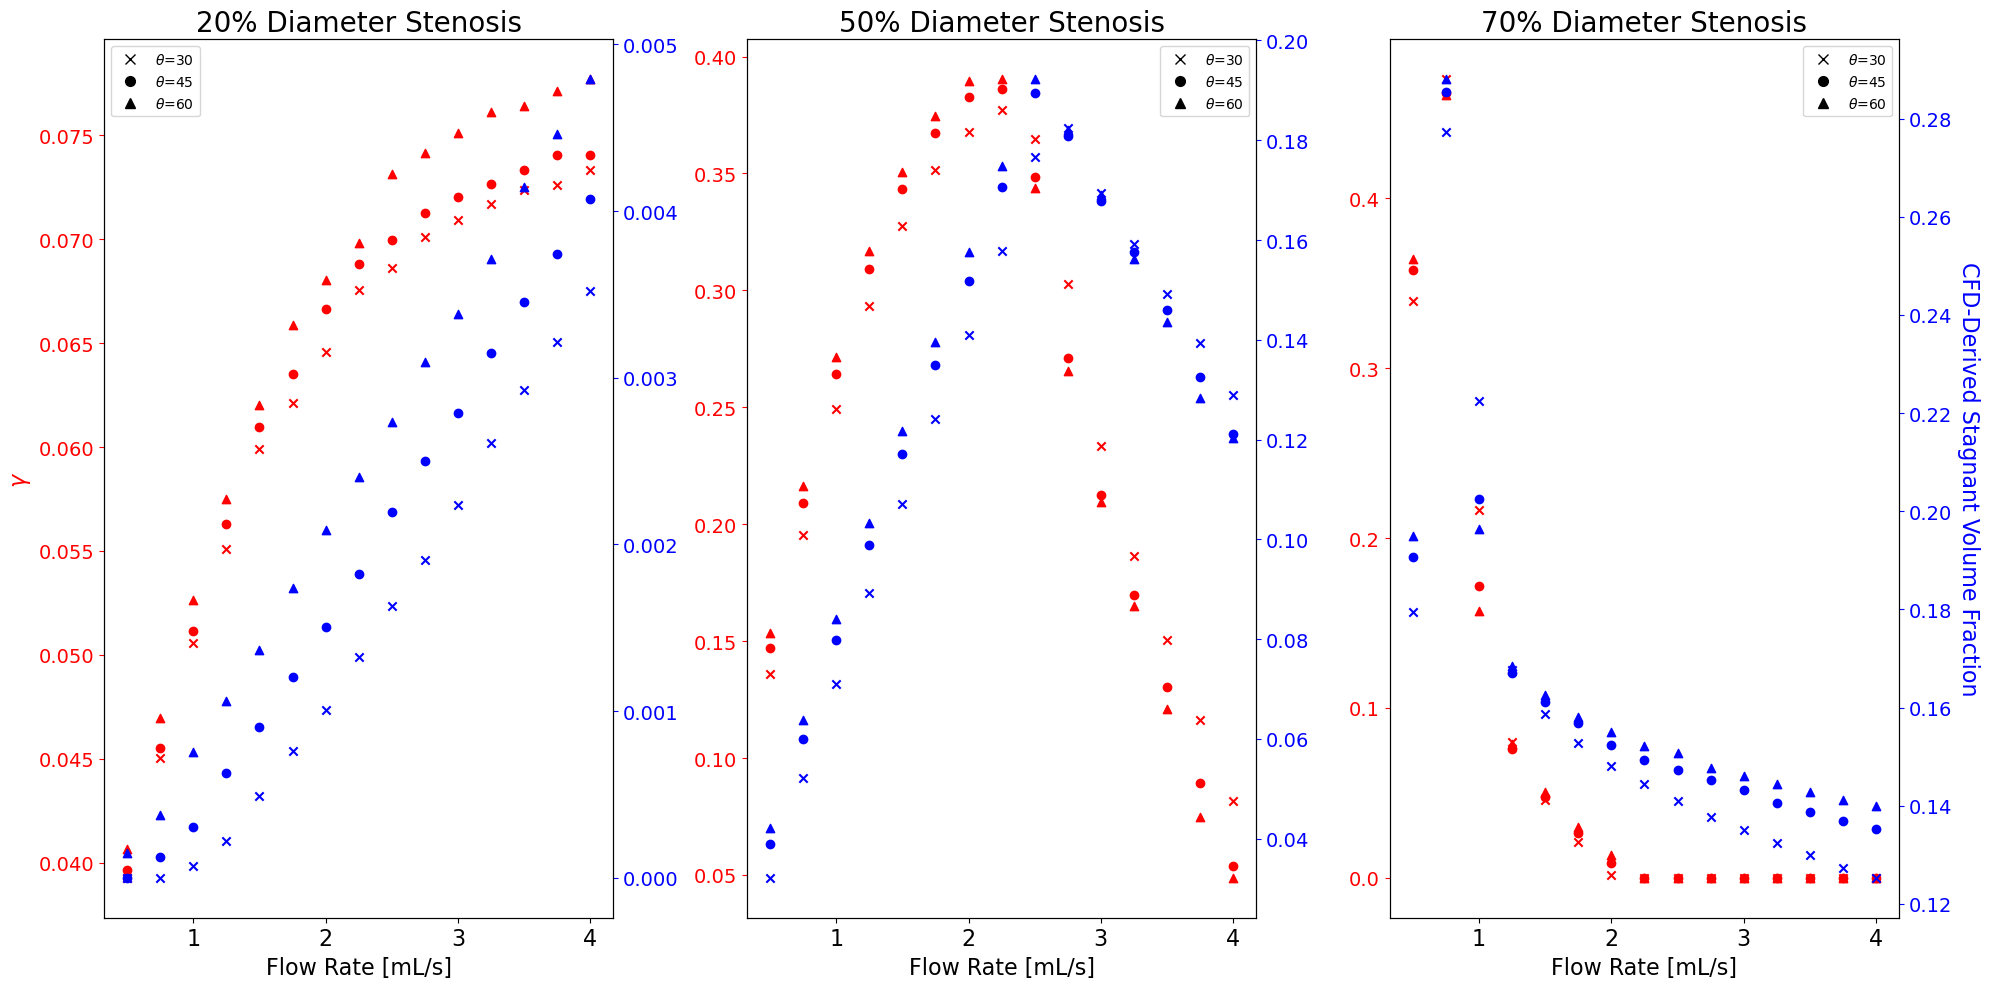

In [39]:
# GAMMA AND CFD DEADZONE VOLUME VERSUS FLOW RATE

# Create figure and subplots
fig, ax = plt.subplots(1, 3, figsize=(20,10))

# Marker dictionary for segmenting by ramp angle
marker_dict = {30: 'x', 45: 'o', 60: '^'}



## 20% DS Subplot
df_ds20 = df[df['PERC_DS']==20]

# Create second y axis for fluent DZ volume plotting
ax0 = ax[0].twinx()

# Loop through each ramp angle for plotting as different marker types
for angle in marker_dict.keys():
    ax[0].scatter(df_ds20[df_ds20['RAMP_ANGLE']==angle].FLOW_RATE, 
                  df_ds20[df_ds20['RAMP_ANGLE']==angle].gamma, 
                  c='r', marker=marker_dict[angle], 
                  label=r'$\theta$ = {}'.format(angle))
    ax0.scatter(df_ds20[df_ds20['RAMP_ANGLE']==angle].FLOW_RATE, 
                df_ds20[df_ds20['RAMP_ANGLE']==angle].FLUENT_DEADZONE_VOLUME \
                / df_ds20[df_ds20['RAMP_ANGLE']==angle].ARTERIAL_VOLUME,
                c='b', marker=marker_dict[angle])

# Set style of the axes
ax[0].set_xlabel('Flow Rate [mL/s]', fontsize=16)
ax[0].set_ylabel(r'$\gamma$', color='red', fontsize=16)
ax[0].set_xticks([1, 2, 3, 4])
ax[0].tick_params(axis='y', colors='red', labelsize=14)
ax[0].tick_params(axis='x', labelsize=16)
ax[0].set_title('20% Diameter Stenosis', fontsize=20)

ax0.tick_params(axis='y', colors='blue', labelsize=14)

# Create a custom legend handle 
legend_handle = [mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=7, label=r'$\theta$=30'),
                 mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label=r'$\theta$=45'),
                 mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=7, label=r'$\theta$=60')]
ax[0].legend(handles=legend_handle)



## 50% DS Plot
df_ds50 = df[df['PERC_DS']==50]

# Create second y axis for fluent DZ volume plotting
ax1 = ax[1].twinx()

# Loop through each ramp angle for plotting as different marker types
for angle in marker_dict.keys():
    ax[1].scatter(df_ds50[df_ds50['RAMP_ANGLE']==angle].FLOW_RATE, 
                  df_ds50[df_ds50['RAMP_ANGLE']==angle].gamma, 
                  c='r', marker=marker_dict[angle], 
                  label=r'$\theta$ = {}'.format(angle))
    ax1.scatter(df_ds50[df_ds50['RAMP_ANGLE']==angle].FLOW_RATE, 
                df_ds50[df_ds50['RAMP_ANGLE']==angle].FLUENT_DEADZONE_VOLUME \
                / df_ds50[df_ds50['RAMP_ANGLE']==angle].ARTERIAL_VOLUME,
                c='b', marker=marker_dict[angle])

# Set style of the axes
ax[1].set_xlabel('Flow Rate [mL/s]', fontsize=16)
ax[1].set_xticks([1, 2, 3, 4])
ax[1].tick_params(axis='y', colors='red', labelsize=14)
ax[1].tick_params(axis='x', labelsize=16)
ax[1].set_title('50% Diameter Stenosis', fontsize=20)

ax1.tick_params(axis='y', colors='blue', labelsize=14)

# Create a custom legend handle 
legend_handle = [mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=7, label=r'$\theta$=30'),
                 mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label=r'$\theta$=45'),
                 mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=7, label=r'$\theta$=60')]
ax[1].legend(handles=legend_handle)



## 50% DS Plot
df_ds70 = df[df['PERC_DS']==70]

# Create second y axis for fluent DZ volume plotting
ax2 = ax[2].twinx()

# Loop through each ramp angle for plotting as different marker types
for angle in marker_dict.keys():
    ax[2].scatter(df_ds70[df_ds70['RAMP_ANGLE']==angle].FLOW_RATE, 
                  df_ds70[df_ds70['RAMP_ANGLE']==angle].gamma, 
                  c='r', marker=marker_dict[angle], 
                  label=r'$\theta$ = {}'.format(angle))
    ax2.scatter(df_ds70[df_ds70['RAMP_ANGLE']==angle].FLOW_RATE, 
                df_ds70[df_ds70['RAMP_ANGLE']==angle].FLUENT_DEADZONE_VOLUME \
                / df_ds70[df_ds70['RAMP_ANGLE']==angle].ARTERIAL_VOLUME,
                c='b', marker=marker_dict[angle])

# Set style of the axes
ax[2].set_xlabel('Flow Rate [mL/s]', fontsize=16)
ax[2].set_xticks([1, 2, 3, 4])
ax[2].tick_params(axis='y', colors='red', labelsize=14)
ax[2].tick_params(axis='x', labelsize=16)
ax[2].set_title('70% Diameter Stenosis', fontsize=20)

ax2.set_ylabel('CFD-Derived Stagnant Volume Fraction', color='blue', rotation=-90, labelpad=20, fontsize=16)
ax2.tick_params(axis='y', colors='blue', labelsize=14)

# Create a custom legend handle 
legend_handle = [mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=7, label=r'$\theta$=30'),
                 mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label=r'$\theta$=45'),
                 mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=7, label=r'$\theta$=60')]
ax[2].legend(handles=legend_handle)


# Adjust whitespace in between subplots
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.5)
plt.tight_layout()
plt.savefig(r'C:\Users\jacob\OneDrive - University of Louisville\Projects\Dissertation\PhaseI\Results_Figures\MODEL_ARTERIES\gamma_DZ_vs_Q.png', 
            dpi=300, 
            bbox_inches='tight', 
            format='png'
)

plt.show()


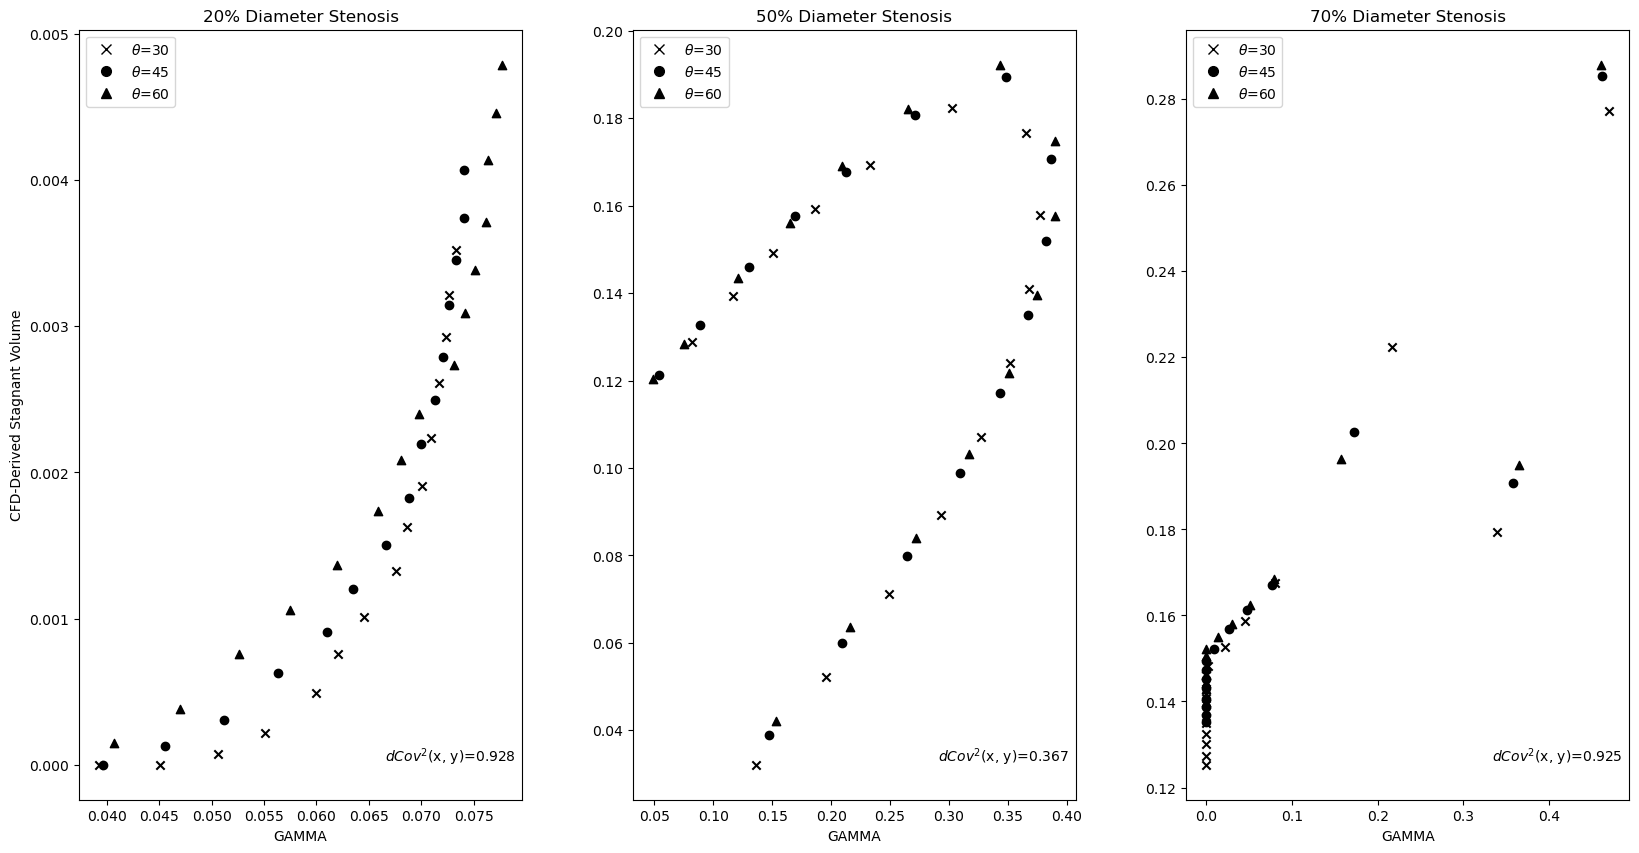

In [38]:
# GAMMA VERSUS CFD DEADZONE VOLUME 
import matplotlib.lines as mlines
import dcor

# Create figure and subplots
fig, ax = plt.subplots(1, 3, figsize=(20,10))

# Marker dictionary for segmenting by ramp angle
marker_dict = {30: 'x', 45: 'o', 60: '^'}



## 20% DS Subplot
df_ds20 = df[df['PERC_DS']==20]

## Calculate distance correlation across all ramp angles
dcor20 = dcor.distance_correlation(
            df_ds20.gamma,
            df_ds20.FLUENT_DEADZONE_VOLUME / df_ds20.ARTERIAL_VOLUME
) 

# Loop through each ramp angle for plotting as different marker types
for angle in marker_dict.keys():
    ax[0].scatter(df_ds20[df_ds20['RAMP_ANGLE']==angle].gamma,
                  df_ds20[df_ds20['RAMP_ANGLE']==angle].FLUENT_DEADZONE_VOLUME \
                  / df_ds20[df_ds20['RAMP_ANGLE']==angle].ARTERIAL_VOLUME, 
                  c='black', marker=marker_dict[angle], 
                  label=r'$\theta$ = {}'.format(angle))


# Set style of the axes
ax[0].set_xlabel('GAMMA')
ax[0].set_ylabel('CFD-Derived Stagnant Volume')
ax[0].tick_params(axis='y')
ax[0].set_title('20% Diameter Stenosis')
ax[0].text(0.69, #noice
           0.05, 
           f'$dCov^2$(x, y)={dcor20:.3f}', 
           transform=ax[0].transAxes
)


# Create a custom legend handle 
legend_handle = [mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=7, label=r'$\theta$=30'),
                 mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label=r'$\theta$=45'),
                 mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=7, label=r'$\theta$=60')]
ax[0].legend(handles=legend_handle)



## 50% DS Subplot
df_ds50 = df[df['PERC_DS']==50]

## Calculate distance correlation across all ramp angles
dcor50 = dcor.distance_correlation(
            df_ds50.gamma,
            df_ds50.FLUENT_DEADZONE_VOLUME / df_ds50.ARTERIAL_VOLUME
) 

# Loop through each ramp angle for plotting as different marker types
for angle in marker_dict.keys():
    ax[1].scatter(df_ds50[df_ds50['RAMP_ANGLE']==angle].gamma,
                  df_ds50[df_ds50['RAMP_ANGLE']==angle].FLUENT_DEADZONE_VOLUME \
                  / df_ds50[df_ds50['RAMP_ANGLE']==angle].ARTERIAL_VOLUME, 
                  c='black', marker=marker_dict[angle], 
                  label=r'$\theta$ = {}'.format(angle))


# Set style of the axes
ax[1].set_xlabel('GAMMA')
ax[1].set_title('50% Diameter Stenosis')
ax[1].text(0.69, #noice
           0.05, 
           f'$dCov^2$(x, y)={dcor50:.3f}', 
           transform=ax[1].transAxes
)

# Create a custom legend handle 
legend_handle = [mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=7, label=r'$\theta$=30'),
                 mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label=r'$\theta$=45'),
                 mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=7, label=r'$\theta$=60')]
ax[1].legend(handles=legend_handle)



## 50% DS Subplot
df_ds70 = df[df['PERC_DS']==70]

## Calculate distance correlation across all ramp angles
dcor70 = dcor.distance_correlation(
            df_ds70.gamma,
            df_ds70.FLUENT_DEADZONE_VOLUME / df_ds70.ARTERIAL_VOLUME
) 

# Loop through each ramp angle for plotting as different marker types
for angle in marker_dict.keys():
    ax[2].scatter(df_ds70[df_ds70['RAMP_ANGLE']==angle].gamma,
                  df_ds70[df_ds70['RAMP_ANGLE']==angle].FLUENT_DEADZONE_VOLUME \
                  / df_ds70[df_ds70['RAMP_ANGLE']==angle].ARTERIAL_VOLUME, 
                  c='black', marker=marker_dict[angle], 
                  label=r'$\theta$ = {}'.format(angle))


# Set style of the axes
ax[2].set_xlabel('GAMMA')
ax[2].set_title('70% Diameter Stenosis')
ax[2].text(0.69, #noice
           0.05, 
           f'$dCov^2$(x, y)={dcor70:.3f}', 
           transform=ax[2].transAxes
)

# Create a custom legend handle 
legend_handle = [mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=7, label=r'$\theta$=30'),
                 mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label=r'$\theta$=45'),
                 mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=7, label=r'$\theta$=60')]
ax[2].legend(handles=legend_handle)


# Adjust whitespace in between subplots
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.5)
plt.savefig(r'C:\Users\jacob\OneDrive - University of Louisville\Projects\Dissertation\PhaseI\Results_Figures\MODEL_ARTERIES\gamma_vs_DZ.png', 
            dpi=300, 
            bbox_inches='tight', 
            format='png'
)

plt.show()


In [29]:
import dcor

bruv = pearsonr(df[df['PERC_DS']==20].gamma,
         df[df['PERC_DS']==20].FLUENT_DEADZONE_VOLUME \
         / df[df['PERC_DS']==20].ARTERIAL_VOLUME
)

gov = pearsonr(np.log(df[df['PERC_DS']==70].beta/df[df['PERC_DS']==70].gamma),
        df[df['PERC_DS']==70].CSTSR_VOLUME/df[df['PERC_DS']==70].ARTERIAL_VOLUME
)

innit = dcor.distance_correlation(df[df['PERC_DS']==50].gamma,
                                  df[df['PERC_DS']==50].FLUENT_DEADZONE_VOLUME \
                                  / df[df['PERC_DS']==50].ARTERIAL_VOLUME
)
print("dcor = ", innit)

dcor =  0.3667387954159527


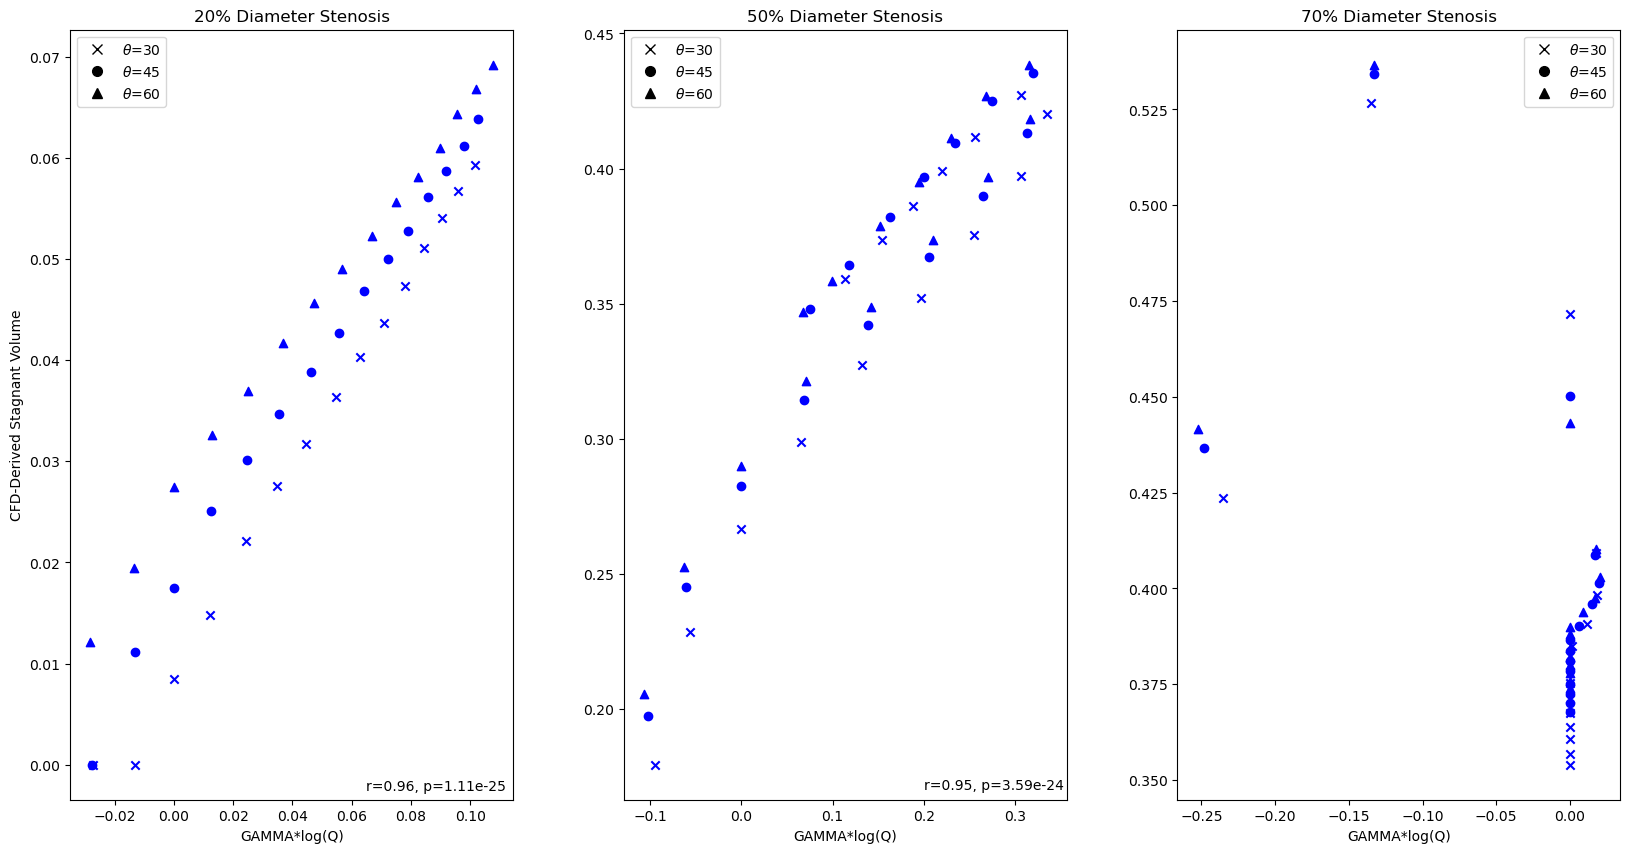

In [10]:
# GAMMA VERSUS CFD DEADZONE VOLUME 
import matplotlib.lines as mlines

# Create figure and subplots
fig, ax = plt.subplots(1, 3, figsize=(20,10))

# Marker dictionary for segmenting by ramp angle
marker_dict = {30: 'x', 45: 'o', 60: '^'}



## 20% DS Subplot
df_ds20 = df[df['PERC_DS']==20]
df_ds50 = df[df['PERC_DS']==50]
df_ds70 = df[df['PERC_DS']==70]


# Calculate statistics to evaluate strength of relationship
r20 = pearsonr(df_ds20.gamma*-np.log(1/df_ds20.FLOW_RATE), 
              (df_ds20.FLUENT_DEADZONE_VOLUME / df_ds20.ARTERIAL_VOLUME)**0.5)
r50 = pearsonr(df_ds50.gamma*-np.log(1/df_ds50.FLOW_RATE), 
              (df_ds50.FLUENT_DEADZONE_VOLUME / df_ds50.ARTERIAL_VOLUME)**0.5)
r70 = pearsonr(df_ds70.gamma*-np.log(1/df_ds70.FLOW_RATE), 
              (df_ds70.FLUENT_DEADZONE_VOLUME / df_ds70.ARTERIAL_VOLUME)**0.5)


# Loop through each ramp angle for plotting as different marker types
for angle in marker_dict.keys():
    ax[0].scatter(df_ds20[df_ds20['RAMP_ANGLE']==angle].gamma*-np.log(1/df_ds20[df_ds20['RAMP_ANGLE']==angle].FLOW_RATE),
                  (df_ds20[df_ds20['RAMP_ANGLE']==angle].FLUENT_DEADZONE_VOLUME \
                  / df_ds20[df_ds20['RAMP_ANGLE']==angle].ARTERIAL_VOLUME)**0.5, 
                  c='blue', marker=marker_dict[angle], 
                  label=r'$\theta$ = {}'.format(angle))


# Set style of the axes
ax[0].set_xlabel('GAMMA*log(Q)')
ax[0].set_ylabel('CFD-Derived Stagnant Volume')
ax[0].tick_params(axis='y')
ax[0].set_title('20% Diameter Stenosis')


# Create a custom legend handle 
legend_handle = [mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=7, label=r'$\theta$=30'),
                 mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label=r'$\theta$=45'),
                 mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=7, label=r'$\theta$=60')]
ax[0].legend(handles=legend_handle)
ax[0].text(0.065, -0.0025, 'r={:.2f}, p={:.2e}'.format(r20[0], r20[1]))



## 50% DS Subplot


# Loop through each ramp angle for plotting as different marker types
for angle in marker_dict.keys():
    ax[1].scatter(df_ds50[df_ds50['RAMP_ANGLE']==angle].gamma*-np.log(1/df_ds50[df_ds50['RAMP_ANGLE']==angle].FLOW_RATE),
                  (df_ds50[df_ds50['RAMP_ANGLE']==angle].FLUENT_DEADZONE_VOLUME \
                  / df_ds50[df_ds50['RAMP_ANGLE']==angle].ARTERIAL_VOLUME)**0.5, 
                  c='blue', marker=marker_dict[angle], 
                  label=r'$\theta$ = {}'.format(angle))


# Set style of the axes
ax[1].set_xlabel('GAMMA*log(Q)')
ax[1].set_title('50% Diameter Stenosis')


# Create a custom legend handle 
legend_handle = [mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=7, label=r'$\theta$=30'),
                 mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label=r'$\theta$=45'),
                 mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=7, label=r'$\theta$=60')]
ax[1].legend(handles=legend_handle)
ax[1].text(0.20, 0.17, 'r={:.2f}, p={:.2e}'.format(r50[0], r50[1]))



## 70% DS Subplot



# Loop through each ramp angle for plotting as different marker types
for angle in marker_dict.keys():
    ax[2].scatter(df_ds70[df_ds70['RAMP_ANGLE']==angle].gamma*-np.log(1/df_ds70[df_ds70['RAMP_ANGLE']==angle].FLOW_RATE),
                  (df_ds70[df_ds70['RAMP_ANGLE']==angle].FLUENT_DEADZONE_VOLUME \
                  / df_ds70[df_ds70['RAMP_ANGLE']==angle].ARTERIAL_VOLUME)**0.5, 
                  c='blue', marker=marker_dict[angle], 
                  label=r'$\theta$ = {}'.format(angle))


# Set style of the axes
ax[2].set_xlabel('GAMMA*log(Q)')
ax[2].set_title('70% Diameter Stenosis')


# Create a custom legend handle 
legend_handle = [mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=7, label=r'$\theta$=30'),
                 mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label=r'$\theta$=45'),
                 mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=7, label=r'$\theta$=60')]
ax[2].legend(handles=legend_handle)
# ax[2].text(-0.2, 0.350, 'r={:.2f}, p={:.3e}'.format(r70[0], r70[1]))


# Adjust whitespace in between subplots
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.5)
plt.show()


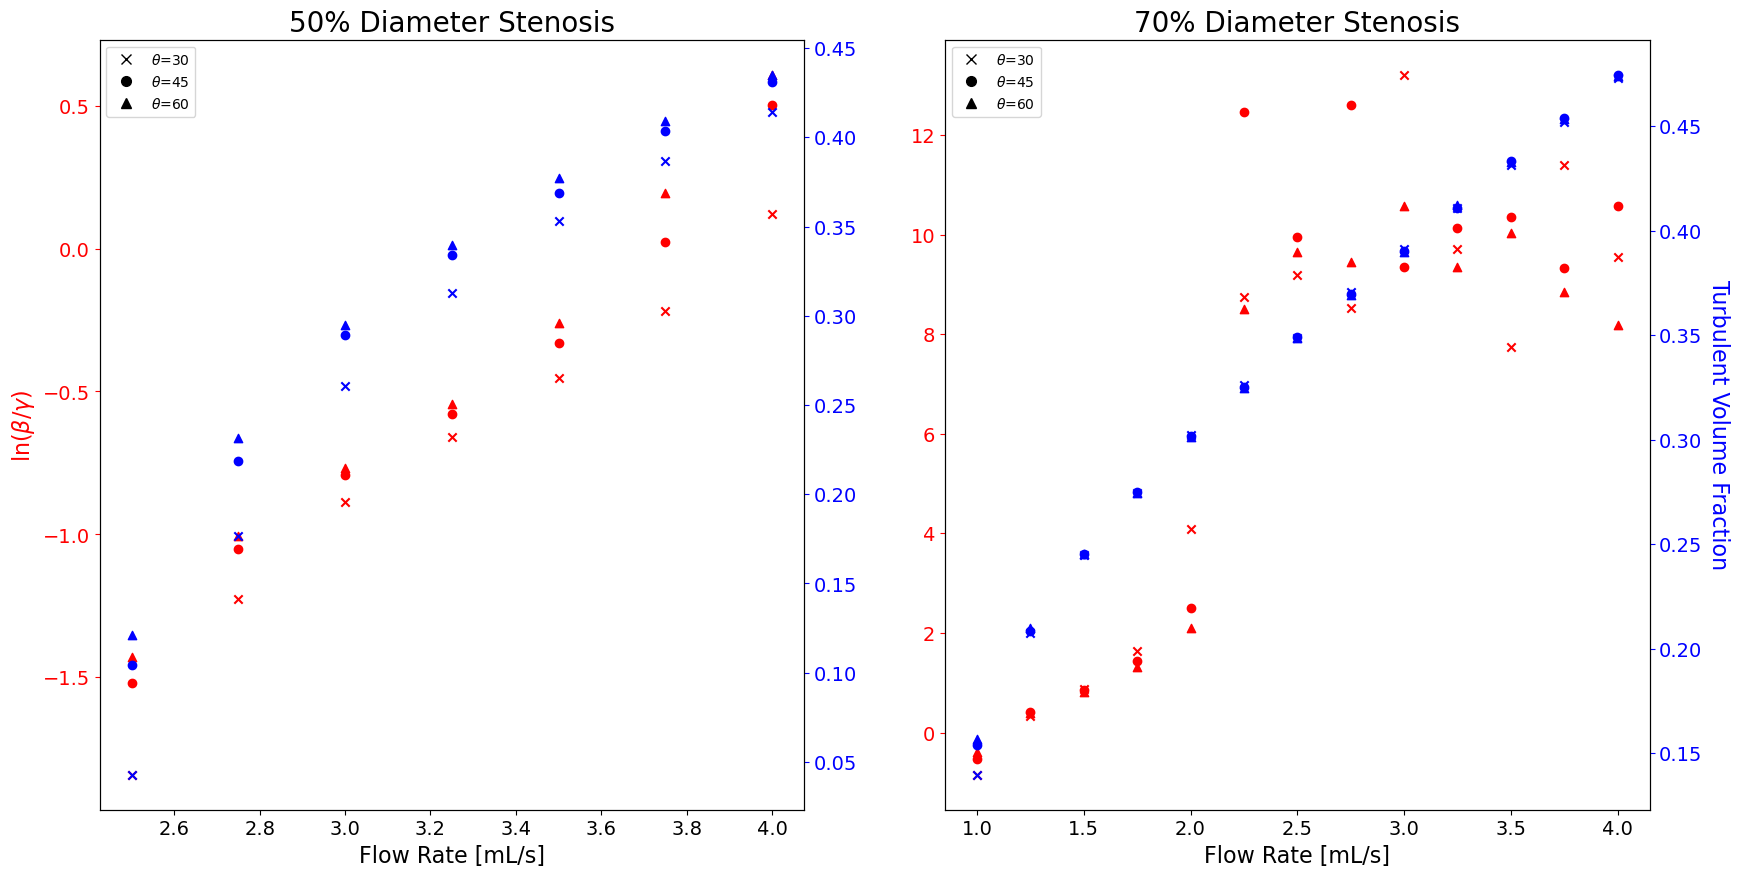

In [41]:
## BETA/GAMMA AND TURBULENT VOLUME VERSUS FLOW RATE

## BETA/GAMMA VS TURBULENT VOLUME

# Create figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(20,10))

# Marker dictionary for segmenting by ramp angle
marker_dict = {30: 'x', 45: 'o', 60: '^'}

df['BETA/GAMMA'] = df['beta'] / df['gamma']
df['TURBULENT_VOLUME_FRACTION'] = df['CSTSR_VOLUME'] / df['ARTERIAL_VOLUME']
df_TI = df[df['CSTSR_VOLUME'] > 0]


# Create slices of data based on %DS
df50 = df_TI[df_TI['PERC_DS']==50]
df70 = df_TI[df_TI['PERC_DS']==70]

# Create twin axes for seconday y axes
ax0_twin = ax[0].twinx()
ax1_twin = ax[1].twinx()



# Loop through each ramp angle for plotting as different marker types
for angle in marker_dict.keys():
    ax[0].scatter(df50[df50['RAMP_ANGLE']==angle].FLOW_RATE,
                  np.log(df50[df50['RAMP_ANGLE']==angle]["BETA/GAMMA"]), 
                  c='red', marker=marker_dict[angle], 
                  label=r'$\theta$ = {}'.format(angle))
    ax0_twin.scatter(df50[df50['RAMP_ANGLE']==angle].FLOW_RATE,
                  df50[df50['RAMP_ANGLE']==angle].TURBULENT_VOLUME_FRACTION, 
                  c='blue', marker=marker_dict[angle])
    



# Set style of the axes
ax[0].set_xlabel('Flow Rate [mL/s]', fontsize=16)
ax[0].set_ylabel(r'ln($\beta$/$\gamma$)', color='red', fontsize=16)
ax[0].tick_params(axis='y', colors='red', labelsize=14)
ax[0].tick_params(axis='x', labelsize=14)
ax[0].set_title('50% Diameter Stenosis', fontsize=20)

ax0_twin.tick_params(axis='y', colors='blue', labelsize=14)


# Create a custom legend handle 
legend_handle = [mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=7, label=r'$\theta$=30'),
                 mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label=r'$\theta$=45'),
                 mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=7, label=r'$\theta$=60')]
ax[0].legend(handles=legend_handle)




# Loop through each ramp angle for plotting as different marker types
for angle in marker_dict.keys():
    ax[1].scatter(df70[df70['RAMP_ANGLE']==angle].FLOW_RATE,
                  np.log(df70[df70['RAMP_ANGLE']==angle]["BETA/GAMMA"]), 
                  c='red', marker=marker_dict[angle], 
                  label=r'$\theta$ = {}'.format(angle))
    ax1_twin.scatter(df70[df70['RAMP_ANGLE']==angle].FLOW_RATE,
                  df70[df70['RAMP_ANGLE']==angle].TURBULENT_VOLUME_FRACTION, 
                  c='blue', marker=marker_dict[angle])
    



# Set style of the axes
ax[1].set_xlabel('Flow Rate [mL/s]', fontsize=16)
ax[1].tick_params(axis='y', colors='red', labelsize=14)
ax[1].tick_params(axis='x', labelsize=14)
ax[1].set_title('70% Diameter Stenosis', fontsize=20)

ax1_twin.tick_params(axis='y', colors='blue', labelsize=14)
ax1_twin.set_ylabel(
    'Turbulent Volume Fraction', 
    rotation=-90, 
    color='blue', 
    labelpad=20, 
    fontsize=16)


# Create a custom legend handle 
legend_handle = [mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=7, label=r'$\theta$=30'),
                 mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label=r'$\theta$=45'),
                 mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=7, label=r'$\theta$=60')]
ax[1].legend(handles=legend_handle, loc='upper left')
plt.savefig(
    r'C:\Users\jacob\OneDrive - University of Louisville\Projects\Dissertation\PhaseI\Results_Figures\MODEL_ARTERIES\lnBetaGamm_vs_turbulence.png',
    dpi=300
)

plt.show()


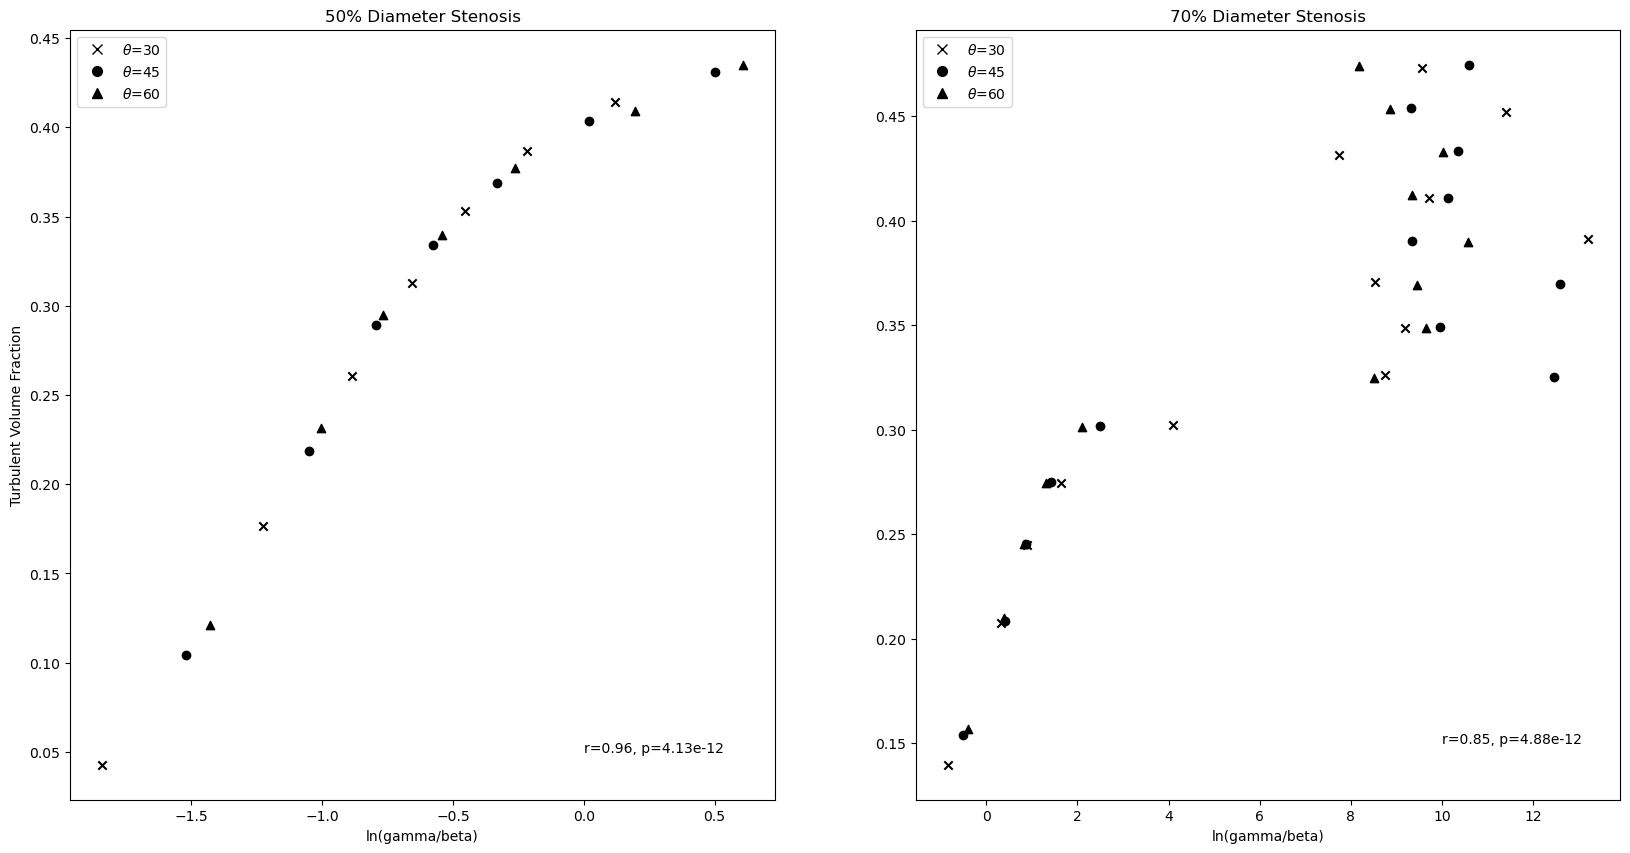

In [42]:
## BETA/GAMMA VS TURBULENT VOLUME

# Create figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(20,10))

# Marker dictionary for segmenting by ramp angle
marker_dict = {30: 'x', 45: 'o', 60: '^'}

df['BETA/GAMMA'] = df['beta'] / df['gamma']
df['TURBULENT_VOLUME_FRACTION'] = df['CSTSR_VOLUME'] / df['ARTERIAL_VOLUME']
df_TI = df[df['CSTSR_VOLUME'] > 0]


# Create slices of data based on %DS
df50 = df_TI[df_TI['PERC_DS']==50]
df70 = df_TI[df_TI['PERC_DS']==70]

# Calculate statistics to evaluate strength of relationship
r50 = pearsonr(np.log(df50['BETA/GAMMA']), df50.TURBULENT_VOLUME_FRACTION)
r70 = pearsonr(np.log(df70['BETA/GAMMA']), df70.TURBULENT_VOLUME_FRACTION)



# Loop through each ramp angle for plotting as different marker types
for angle in marker_dict.keys():
    ax[0].scatter(np.log(df50[df50['RAMP_ANGLE']==angle]["BETA/GAMMA"]),
                  df50[df50['RAMP_ANGLE']==angle].TURBULENT_VOLUME_FRACTION, 
                  c='black', marker=marker_dict[angle], 
                  label=r'$\theta$ = {}'.format(angle))
    



# Set style of the axes
ax[0].set_xlabel('ln(gamma/beta)')
ax[0].set_ylabel('Turbulent Volume Fraction')
ax[0].tick_params(axis='y')
ax[0].set_title('50% Diameter Stenosis')
ax[0].text(0.0, 0.05, 'r={:.2f}, p={:.2e}'.format(r50[0], r50[1]))

# Create a custom legend handle 
legend_handle = [mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=7, label=r'$\theta$=30'),
                 mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label=r'$\theta$=45'),
                 mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=7, label=r'$\theta$=60')]
ax[0].legend(handles=legend_handle)




# Loop through each ramp angle for plotting as different marker types
for angle in marker_dict.keys():
    ax[1].scatter(np.log(df70[df70['RAMP_ANGLE']==angle]["BETA/GAMMA"]),
                  df70[df70['RAMP_ANGLE']==angle].TURBULENT_VOLUME_FRACTION, 
                  c='black', marker=marker_dict[angle], 
                  label=r'$\theta$ = {}'.format(angle))




# Set style of the axes
ax[1].set_xlabel('ln(gamma/beta)')
ax[1].tick_params(axis='y')
ax[1].set_title('70% Diameter Stenosis')
ax[1].text(10, 0.15, 'r={:.2f}, p={:.2e}'.format(r70[0], r70[1]))


# Create a custom legend handle 
legend_handle = [mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=7, label=r'$\theta$=30'),
                 mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label=r'$\theta$=45'),
                 mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=7, label=r'$\theta$=60')]
ax[1].legend(handles=legend_handle, loc='upper left')

plt.savefig(
    r'C:\Users\jacob\OneDrive - University of Louisville\Projects\Dissertation\PhaseI\Results_Figures\MODEL_ARTERIES\lnBetaGamma_vs_TVF.png',
    dpi=300
)
plt.show()





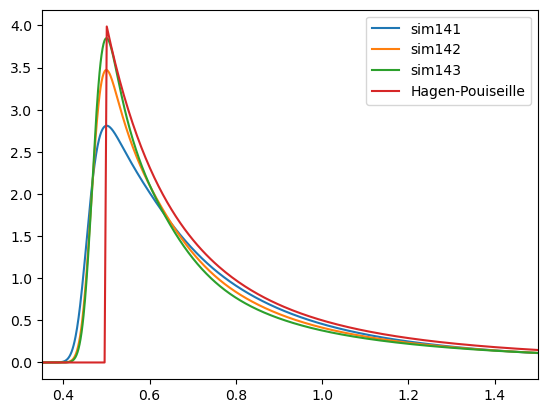

In [13]:
labels = [x for x in range(141, 144)]

e_dir = "..\data\Etheta_curves"

paths = [path.join(e_dir, f"sim{sim_num}.csv") for sim_num in labels]

plt.figure()
for i, rtd_path in enumerate(paths):
    e_theta = pd.read_csv(rtd_path, index_col=0)
    mode = e_theta[e_theta.Et == e_theta.Et.max()].time.item()
    shift = 0.5 - mode
    plt.plot(e_theta.time + shift, e_theta.Et, label=f'sim{i+141}')

X = np.linspace(0, 5, 1000)
Y = [0 if x < 0.5 else 1/2/x**3 for x in X]
plt.plot(X, Y, label='Hagen-Pouiseille')
plt.xlim(0.35, 1.5)
# plt.ylim(1.5, 3)
plt.legend()

plt.show()

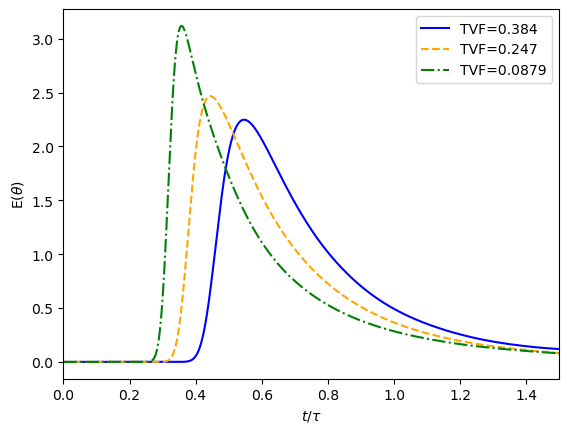

In [79]:
case_index = [151, 155, 157]
TVF = [0.384, 0.247, 0.0879]
style_dict = [['blue','-'], ['orange', '--'], ['green', '-.']]

plt.figure()

for i, idx in enumerate(case_index):
    Etheta = pd.read_csv(f'../data/Etheta_curves/sim{idx}.csv', index_col=0)
    plt.plot(Etheta.time, 
             Etheta.Et, 
             label=f'TVF={TVF[i]}',
             color=style_dict[i][0],
             linestyle=style_dict[i][1]
    )

plt.ylabel(r'E($\theta$)')
plt.xlabel(r'$t / \tau $')
plt.legend()
plt.xlim(0, 1.5)



plt.savefig(
    r'C:\Users\jacob\OneDrive - University of Louisville\Projects\Dissertation\PhaseI\Results_Figures\MODEL_ARTERIES\TVF_Ecurves.png',
    dpi=300
)
plt.show()


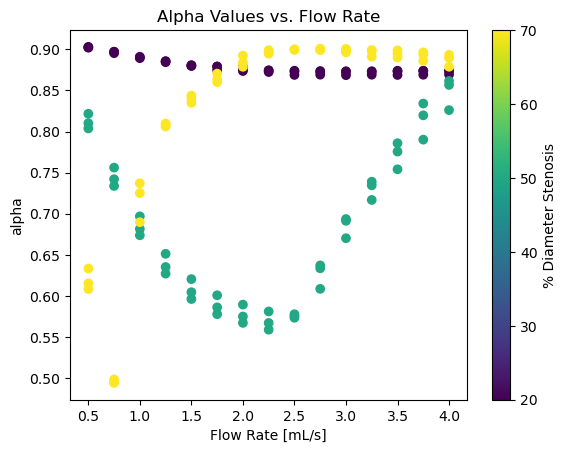

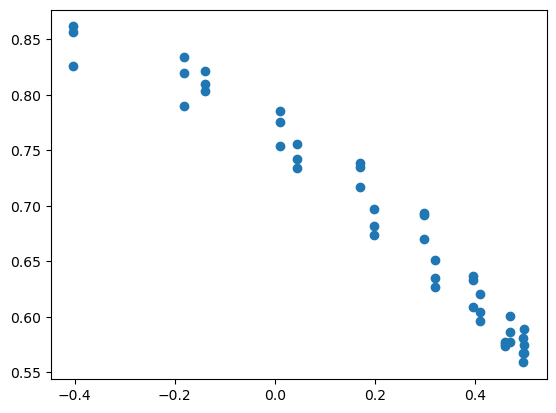

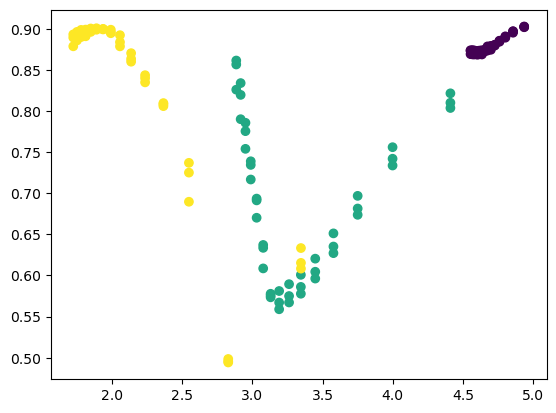

In [14]:
df['DR'] = (100 - df.PERC_DS)/100

fig, ax = plt.subplots()
sc = ax.scatter(df.FLOW_RATE, df['alpha'], c=df.PERC_DS)
plt.xlabel('Flow Rate [mL/s]')
plt.ylabel('alpha')
cbar = fig.colorbar(sc)
cbar.set_label('% Diameter Stenosis')
plt.title('Alpha Values vs. Flow Rate')
plt.show()

fig, ax = plt.subplots()
ax.scatter(-(df[df['PERC_DS']==50].DR/2)*(df[df['PERC_DS']==50].FLOW_RATE - 2.1)**2 + df[df['PERC_DS']==50].DR, df[df['PERC_DS']==50]['alpha'])
plt.show()


fig, ax = plt.subplots()
a = -0.2
b = 0
ax.scatter(1/(a*np.log(1-(df.PERC_DS/100)**2)*np.log(df.FLOW_RATE) - a/(1 - (df.PERC_DS/100)**2) + b), df.alpha, c=df.PERC_DS)
plt.show()

# pearsonr(df[df['PERC_DS']==20].FLOW_RATE, df[df['PERC_DS']==20].alpha)

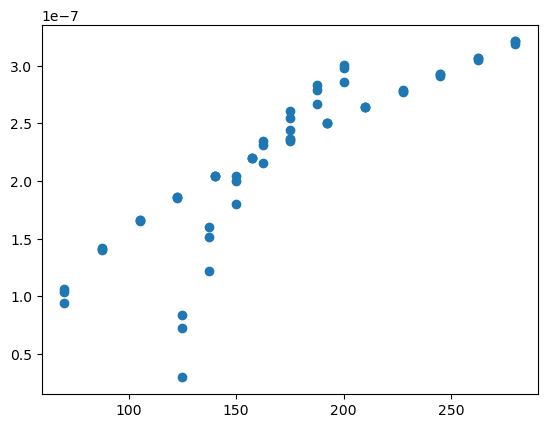

In [15]:
fig, ax = plt.subplots()

X = df[df.CSTSR_VOLUME > 0].FLOW_RATE * df[df.CSTSR_VOLUME > 0].PERC_DS
Y = df[df.CSTSR_VOLUME > 0].CSTSR_VOLUME

ax.scatter(X, Y)
plt.show()